# Learning Tonal Corrections
We can either learn exposure and contrast; or learn a tone curve which is expressive enough to produce both of these filters. We analyze results from training:

In [1]:
from PIL import Image
from torch.jit import load
from torchvision.transforms import Compose, Normalize, Resize, ToPILImage, ToTensor

# Transforms
to_tensor = Compose([
    Resize(1024),
    ToTensor(),
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
to_image = Compose([
    Normalize(mean=[-1., -1., -1.], std=[2., 2., 2.]),
    ToPILImage()
])

# Load model
#model = load("../pretrained/deep_edit_tc_cgp1950.pt")
model = load("../deep_edit.pt")

# Open and convert
image = Image.open("../media/highlight/1.jpg")
input = to_tensor(image).unsqueeze(dim=0)

# Inference
weights = model.weights(input)
result = model.filter(input, weights)

# Convert
image = to_image(input.squeeze(dim=0))
result = to_image(result.squeeze(dim=0))

We visualize the input and result:

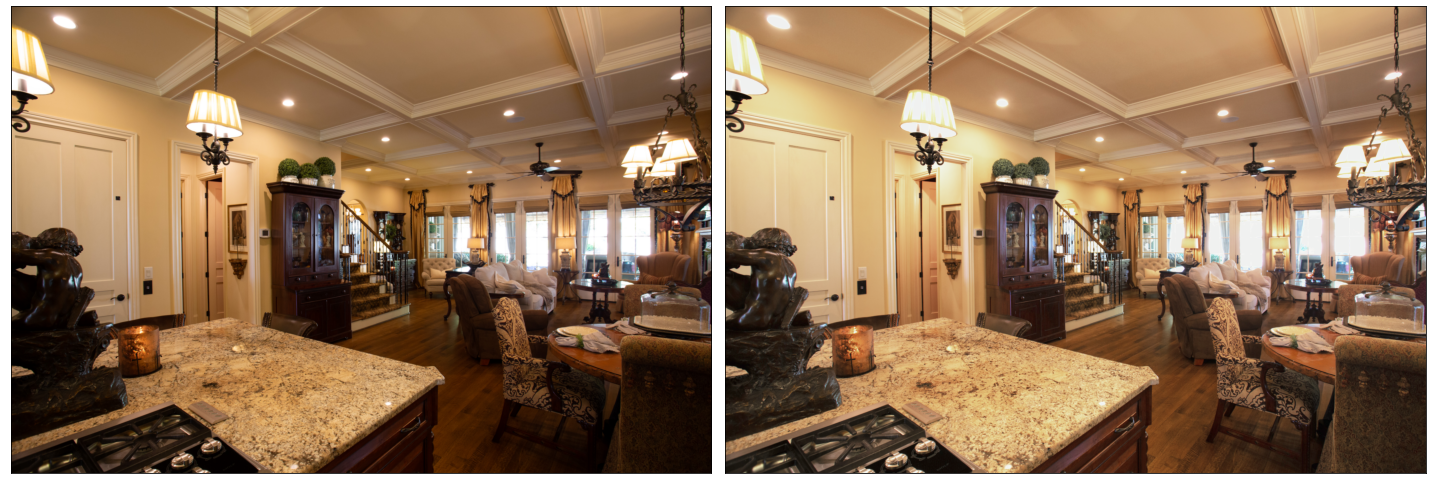

In [2]:
from matplotlib import pyplot as plt
from numpy import asarray

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(asarray(image))
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(asarray(result))
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

Finally, we visualize the tone curve:

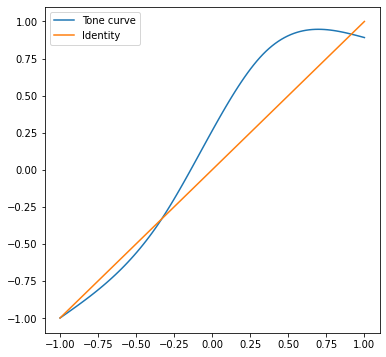

In [3]:
from plasma.filters import tone_curve
from torch import cat, linspace, tensor
import seaborn as sns

# Compute curve
controls = cat([tensor(-1.).expand(1, 1), weights[:,:3]], dim=1)
x = linspace(-1., 1., 100)
y = tone_curve(x.unsqueeze(dim=0), controls.detach()).squeeze(dim=0)

# Plot
plt.figure(figsize=(6, 6))
sns.lineplot(x, y, label="Tone curve")
sns.lineplot(x, x, label="Identity")
plt.show()

In [4]:
controls

tensor([[-1.0000, -0.3343,  0.7787,  0.8915]], grad_fn=<CatBackward>)